# <font color='green' style='font-size: 40px;'> Questão 1 | P2 | 2019.1 (resolvida) </font> <hr style='border: 2px solid green;'>

## <font color='green' style='font-size: 28px;'>Deduza as expressões:</font> 

https://lpsa.swarthmore.edu/Root_Locus/DeriveRootLocusRules.html

## <font color='green' style='font-size: 22px;'> a) para o cálculo do centróide das assíntotas (ponto de partida das assíntotas) </font> 

## <font color='green' style='font-size: 22px;'> b) para cálculo do ângulo das assíntotas. </font> 

# <font color='green' style='font-size: 40px;'> Questão 2 | P2 | 2019.1 (resolvida) </font> <hr style='border: 2px solid green;'>



## <font color='green' style='font-size: 28px;'>Dada uma planta duplo integrador:</font> 

## <font color='green' style='font-size: 22px;'> a) Use o lugar das raízes para projetar um controlador de avanço tal que os pólos de malha fechada estejam associados: </font> 

$\zeta = \frac{\sqrt{2}}{2} \\$
$\omega_n = 2$

Para uma planta do tipo duplo integrador,$\frac{1}{s^2}$, temos a seguinte lugar das raízes:

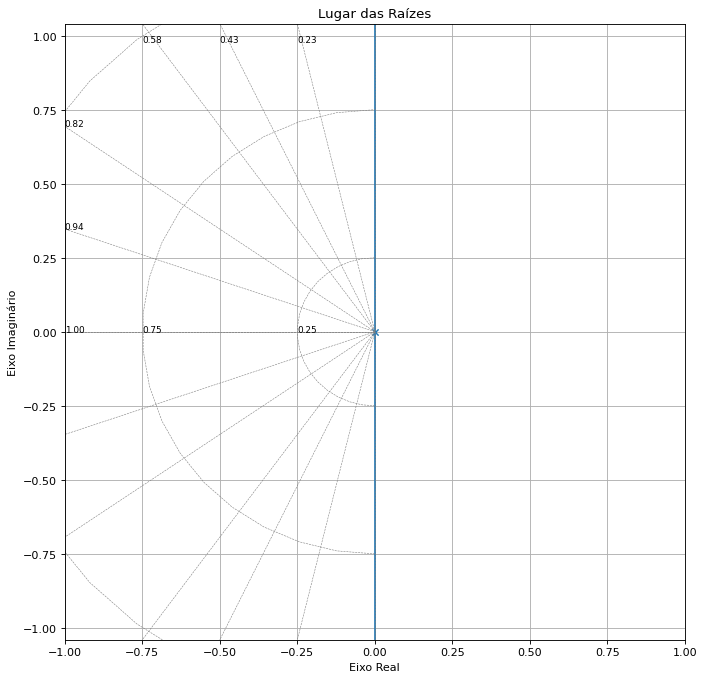

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definindo a função de transferência da malha aberta 'duplo integrador'
G = ctl.tf([1], [1, 0, 0])

# Defina o tamanho do gráfico e a densidade de pontos
plt.figure(figsize=(10,10), dpi=80)

# Plote o lugar das raízes
ctl.root_locus(G, Plot=True)

# Configurações do gráfico
plt.title('Lugar das Raízes')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.grid(True)

# Exiba o gráfico
plt.show()


Como vemos, há dois polos na origem e duas assintotas para o infinito. Esse lugar geométrico das raízes não nos produzirá os requisitos $\zeta = \frac{\sqrt{2}}{2}$ e $\omega_n = 2$ solicitados, ou seja, não há ajuste de ganho possível que faça essa sintonia. Por isso, vamos pensar sobre qual lugar LGR nos atenderia e para isso, suponha um par de raízes complexas conjugadas do tipo $s_{1,2}=\zeta \omega_n \pm j\omega_d$ que será $s_{1,2}=\sqrt{2} \pm j\sqrt{2}$.

Esse par de raízes complexas e conjugadas cumpre os requisitos, pois foram diretamente produzidas a partir deles. O LGR para elas será dada pela expressão:

$$
G_F(s) = s^2+2\sqrt{2}s+4 
$$


 O LGR que ela define é o seguinte:

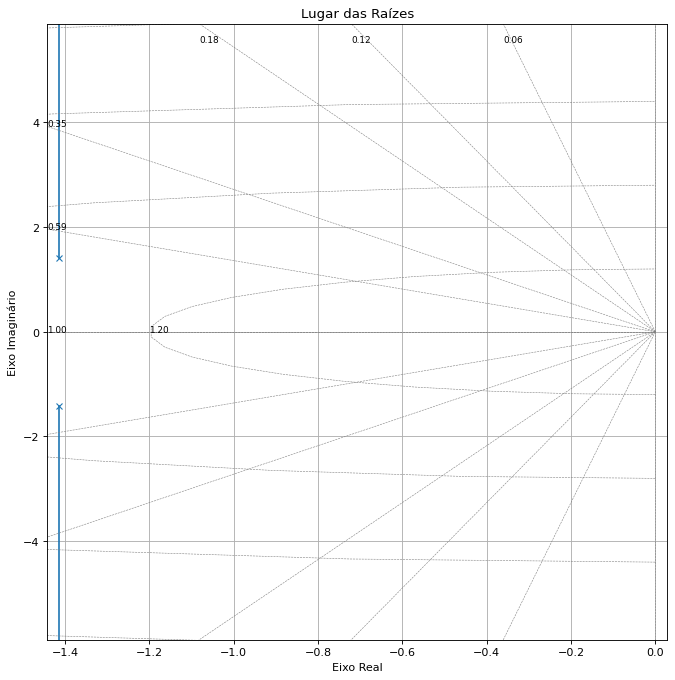

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definindo a função de transferência da malha aberta 'duplo integrador'
G = ctl.tf([4], [1, 2 * np.sqrt(2), 4])

# Defina o tamanho do gráfico e a densidade de pontos
plt.figure(figsize=(10,10), dpi=80)

# Plote o lugar das raízes
ctl.root_locus(G, Plot=True)

# Configurações do gráfico
plt.title('Lugar das Raízes')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.grid(True)


# Exiba o gráfico
plt.show()

É possível projetar um controlador $C(s)$ que ao ser adicionado em cascata com a plata, modifique a função transferência de forma a posicionar suas raízes no LGR mostrado acima. Esse tipo de modificação se faz com controladores de avanço! 

Por que um controlador de avanço? Porque ele move o centroide do $C_{LGR}$ para o lado esquerdo do plano $s$. Isso será preciso, pois como vimos, o nosso $C_{LGR} = - \sqrt{2}$ :

$$
C_{LGR} = \frac{(-\sqrt{2} + j\sqrt{2})+(-\sqrt{2} - j\sqrt{2})}{2} = -\sqrt{2}
$$

> **OBS.:** Um dos efeitos de se mover o centroide para esquerda é o aumento da estabilidade, o que é interessante. Mas não é precisamente por isso que estamos fazendo, e sim porque queremos cumprir os requisitos de desempenho solicitados.

Existem diferentes métodos para projetar o compensador de avanço, que levam a diferentes resultados — como indica Ogata, pg. 601. No nosso caso, vamos posicionar o zero de nosso controlador em $-\sqrt{2}$, pois isso fará com que $C_{LGR}$ fique onde precisamos, veja:

$$
C_{LGR} = \frac{(0 + 0) - \sqrt{2}}{2-1} = -\sqrt{2}
$$

Agora, vamos calcular o $z_p$ usando o critério angular:

$$
180° - 2(135°) + 90° = 0°
$$

Isso é um problema, pois precisamos de uma defasagem de angulo à ser compensada pelo polo que falta adicionar. Por isso, vou arbitráriamente posicionar o zero em $-1$. Isso nos dará uma margem para o polo.

$$
180° - 2(135°) + 106.32° = -16.35° → \tg{-16.35} = \frac{\sqrt{2}}{x} → x = -4.827 → P_c = x+1 = \boxed{-3.827}
$$

Ok, para compensar $-16.35°$ você precisa posicionar seu polo em $-3.827$. Agora, o que falta é encontrar nosso $k_c$ e usaremos a condição de módulo. Para isso devemos lembrar que nosso $s_{1,2}=\sqrt{2} \pm j\sqrt{2}$, considerando:

$$
k_c\frac{\left|s+1\right|}{\left|s+3.827\right|\left|s\right|^2}=1 → k_c = 9.42
$$

Com isso, temos a nossa função transferência de malha fechada sendo:

$$
G_F(s) = \frac{k\left(s+1\right)}{s^3+3.827s^2+ks+k}
$$

Agora vamos obter o LGR dessa função de trasferência.

c:\Users\Mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\control\rlocus.py:132: FutureWarning: 'Plot' keyword is deprecated in root_locus; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in root_locus; "


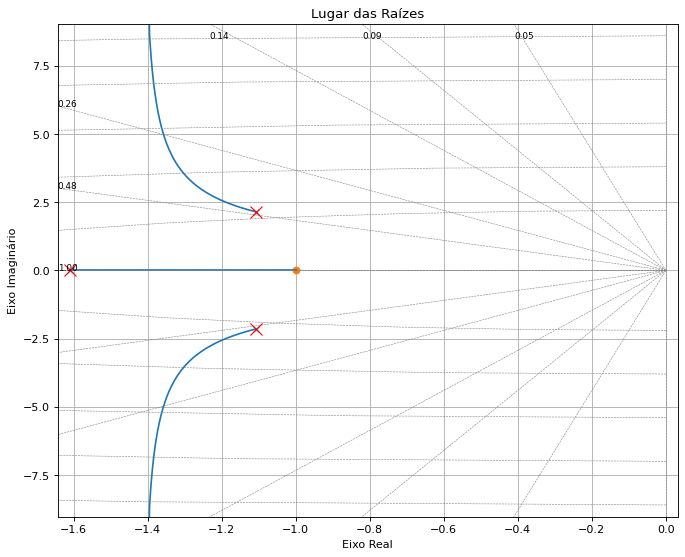

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

k = 9.42

# Definindo a função de transferência da malha fechada
G = ctl.tf([k, k], [1, 3.827, k, k])

# Obter os polos da função de transferência
poles = ctl.pole(G)

# Defina o tamanho do gráfico e a densidade de pontos
plt.figure(figsize=(10,8), dpi=80)

# Defina o intervalo dos eixos real e imaginário
plt.xlim([-7, 2])
plt.ylim([-5, 5])

# Plote o lugar das raízes
ctl.root_locus(G, Plot=True)

# Plotar os polos no gráfico
plt.plot(np.real(poles), np.imag(poles), 'rx', markersize=10, label='Polos')


# Configurações do gráfico
plt.title('Lugar das Raízes')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.grid(True)

# Exiba o gráfico
plt.show()

## <font color='green' style='font-size: 22px;'>b) calcule a função de transferência da malha fechada.</font> 

Considerando nosso sistema de malha aberta:

$$
G_A(s) = 9.42 \frac{(s+1)}{(s+3.827)} \frac{1}{s^2} \\

G_F(s) = \frac{G_A(s)}{1+G_A(s)} → \frac{9.42s + 9.42}{s^3 + 3.827s^2 + 9.42s + 9.42} 
$$

$$
G_F(s) =  \boxed{\frac{9.42s + 9.42}{s^3 + 3.827s^2 + 9.42s + 9.42}}
$$



## <font color='green' style='font-size: 22px;'>c) se a resposta da saída terá o sobressinal correspondente ao previsto pelos parâmetros.</font> 

Não há um cálculo que nos dê um sobressinal para uma expressão de ordem superior ($>2°$). Como nossa FT não tem polos complexos conjugados dominantes, não há como aproximar o comportamento dela. Os zero e polo do compensador influenciam em seu sobressinal. Mas, podemos obter numéricamente o sobressinal, a partir de $\zeta = \frac{\sqrt{2}}{2}$ 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
import pandas as pd

k = 9.42

# Definindo a função de transferência da malha fechada
G = ctl.tf([k, k], [1, 3.827, k, k])

# Obtendo as informações da resposta ao degrau
info = ctl.step_info(G)

# Convertendo o dicionário em um dataframe
df = pd.DataFrame.from_dict(info, orient='index', columns=['valor'])

# Imprimindo o dataframe
df

,valor
RiseTime,0.440640
SettlingTime,3.462169
SettlingMin,0.912254
SettlingMax,1.449663
Overshoot,44.966331
Undershoot,0.000000
Peak,1.449663
PeakTime,1.258971
SteadyStateValue,1.000000


## <font color='green' style='font-size: 22px;'>d) calcule a constante de aceleração, visto que a planta é do tipo 2.</font> 

## Memória de cálculo e dúvidas <hr style='line: 2px solid white;'>

1. Para plotar o lugar das raízes, o python usa a FT. Mas acho que na prática se usa a equação característica: $1+k \frac{N(s)}{D(s)} = 0$
2. Não entendi o que fazer na questão do erro estacionário. Eu sei que $K_a$ será dada por : $K_a = \frac{1}{e_{ss}}$, mas isso significa que tenho que calcular o erro no estado estacionário para uma entrada do tipo parábola?

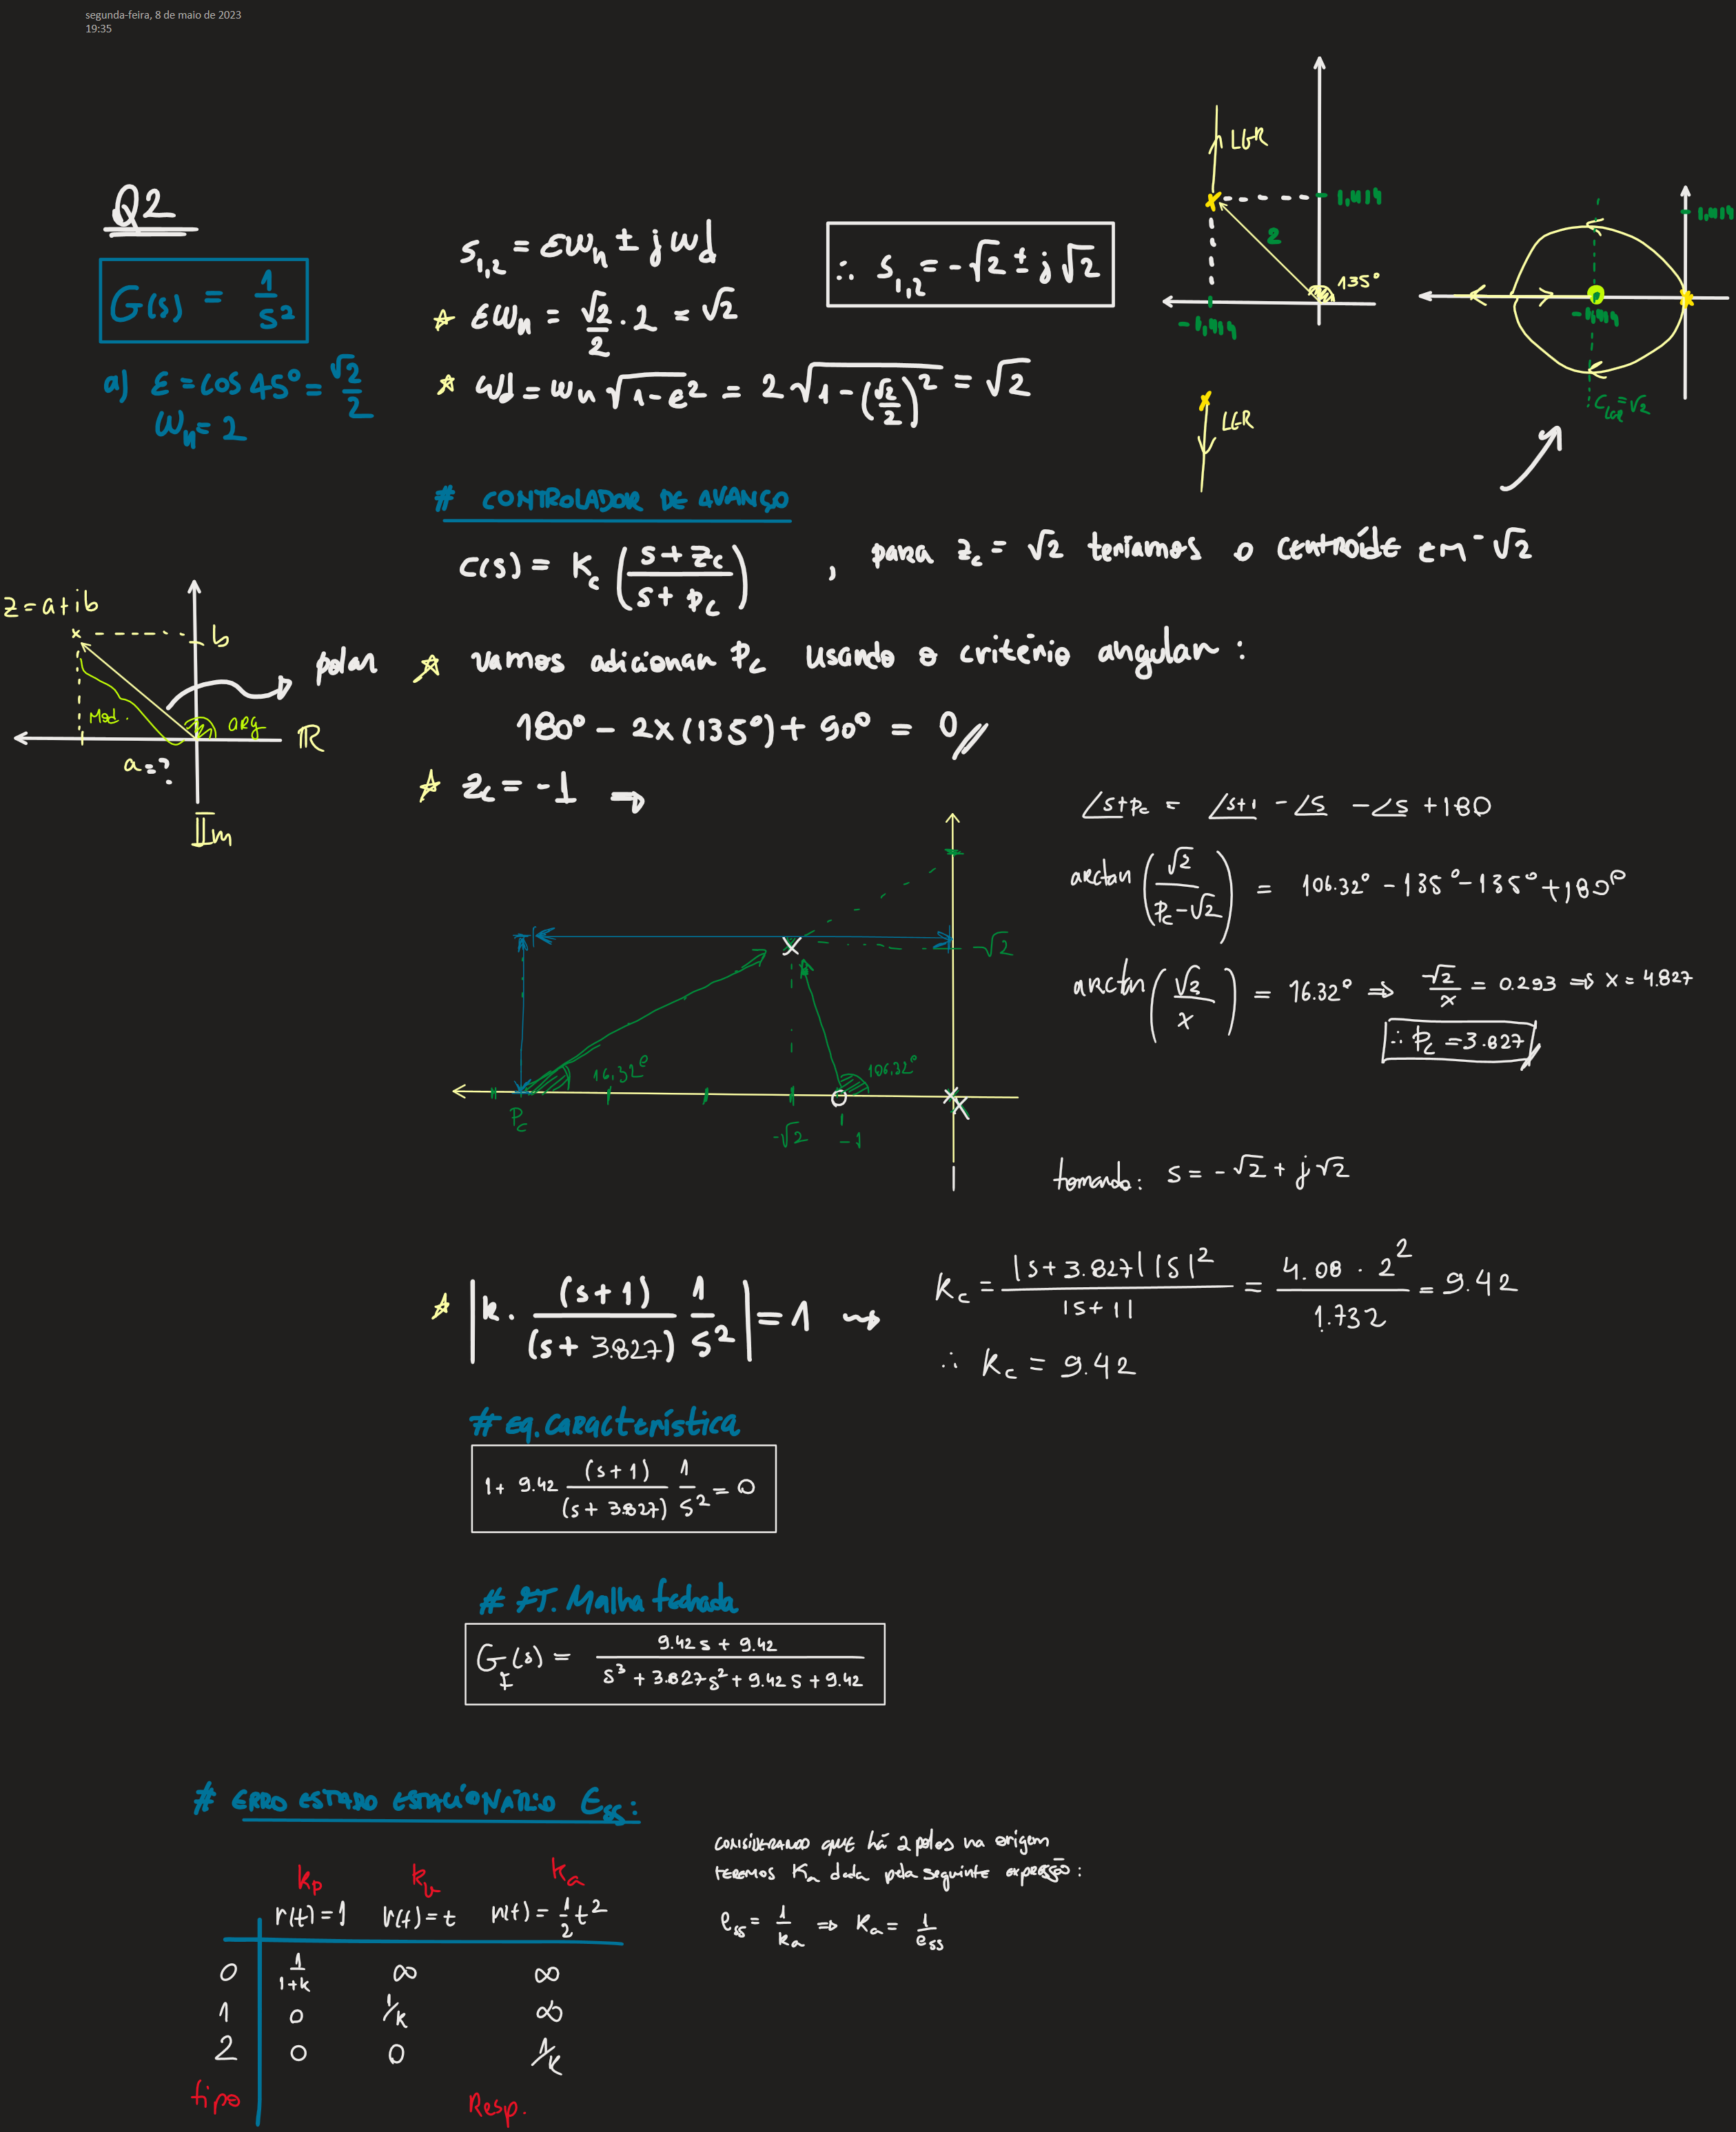

# <font color='green' style='font-size: 40px;'> Questão 3 | P2 | 2019.1 (resolvida) </font> <hr style='border: 2px solid green;'>

## <font color='green' style='font-size: 28px;'>É proposto um lugar das raízes (figura A) para análise do efeito do parâmetro Ti nos polos da malha fechada. O sistema de controle tem controlador PI, C(s), e a planta é do tipo primeira ordem sem atraso G(s).</font> 

$$
C(s) = 1 \frac{s+\frac{1}{T_i}}{s} \\
G(s) = \frac {1}{s+1}

$$

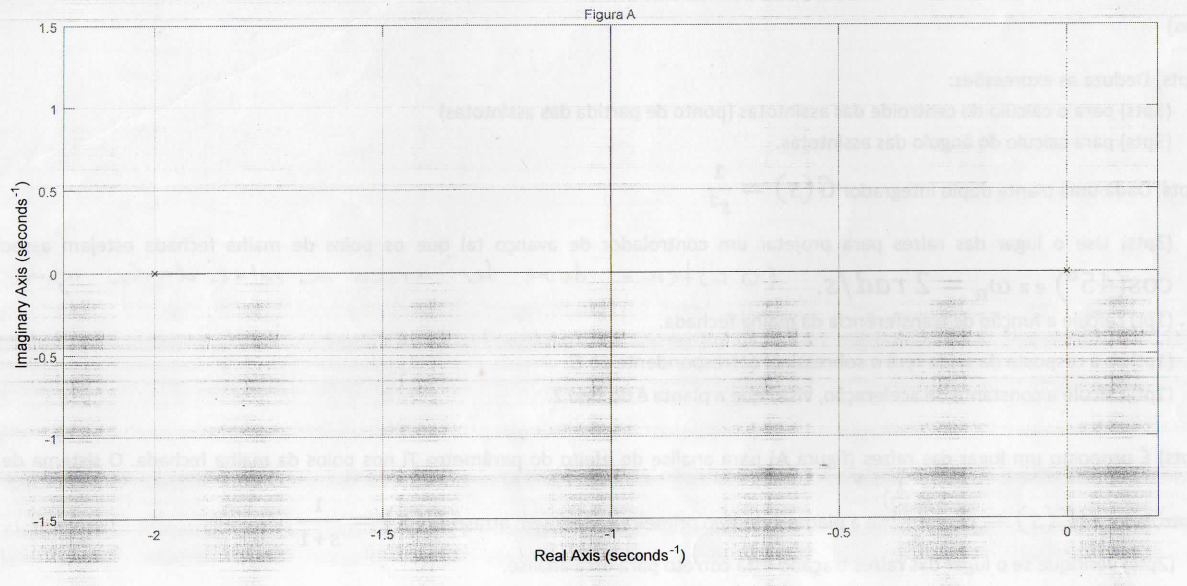

## <font color='green' style='font-size: 22px;'> a) verifique se o lugar das raízes traçado está correto para essa análise </font> 

Com o objetivo de obter uma expressão do tipo: $1+\frac{N(s)}{D(s)}=0$, podemos rearranjar o denominador da FT de malha fechada para obter:

$$
1 + \frac{1}{t_i} \cdot \frac{1}{s(s+2)} = 0
$$

O lugar das raízes está certo:

    - Temos dois polos, -2 e 0;
    - O número e angulo das assintotas bate;
    - O centróide está em -1. 

## <font color='green' style='font-size: 22px;'> b) use a condição de módulo para determinar a faixa de valores de Ti que resulta no comportamento subamortecido. </font> 

Para que um sistema seja subamortecido, ele precisa ter ter raízes com parte real e parte imaginária. Sabemos que a única forma de ter isso é com polos complexos e conjugados. Logo, observando o LGR — que já vimos estar correto — podemos supor que para que haja subamortecimento, as raízes devem estar localizadas onde a parte real é $-1$. Vamos tomar $s=-1$

## <font color='green' style='font-size: 22px;'> c) Caso o ganho da planta seja 2, desenhe o novo lugar das raízes para essa situação. </font> 

continue aqui...

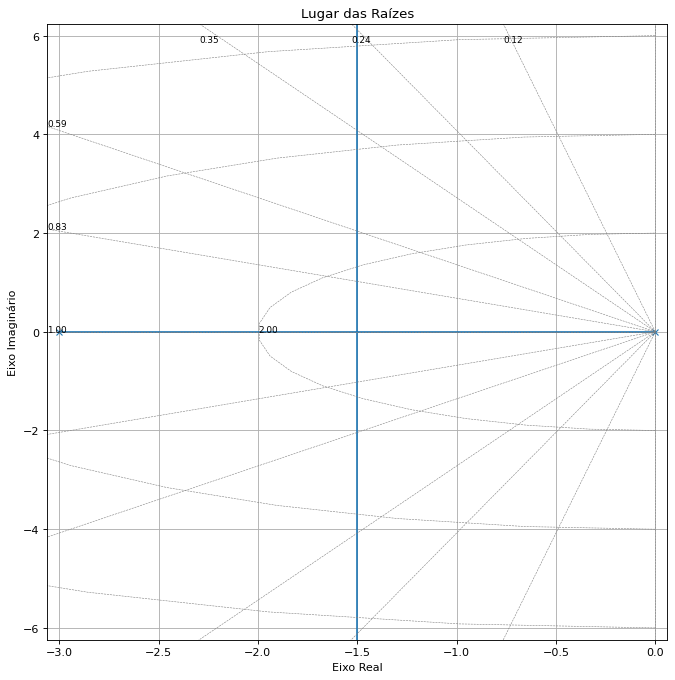

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# parâmetro t_i
t_i = 2

# Definindo a função de transferência da malha aberta 
G = ctl.tf([t_i], [1, 3, 0])

# Defina o tamanho do gráfico e a densidade de pontos
plt.figure(figsize=(10,10), dpi=80)

# Plote o lugar das raízes
ctl.root_locus(G, plot=True, grid=True, print_gain=True)

# Configurações do gráfico
plt.title('Lugar das Raízes')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.grid(True)

# Exiba o gráfico
plt.show()


## Memória de cálculo e dúvidas <hr style='line: 2px solid white;'>

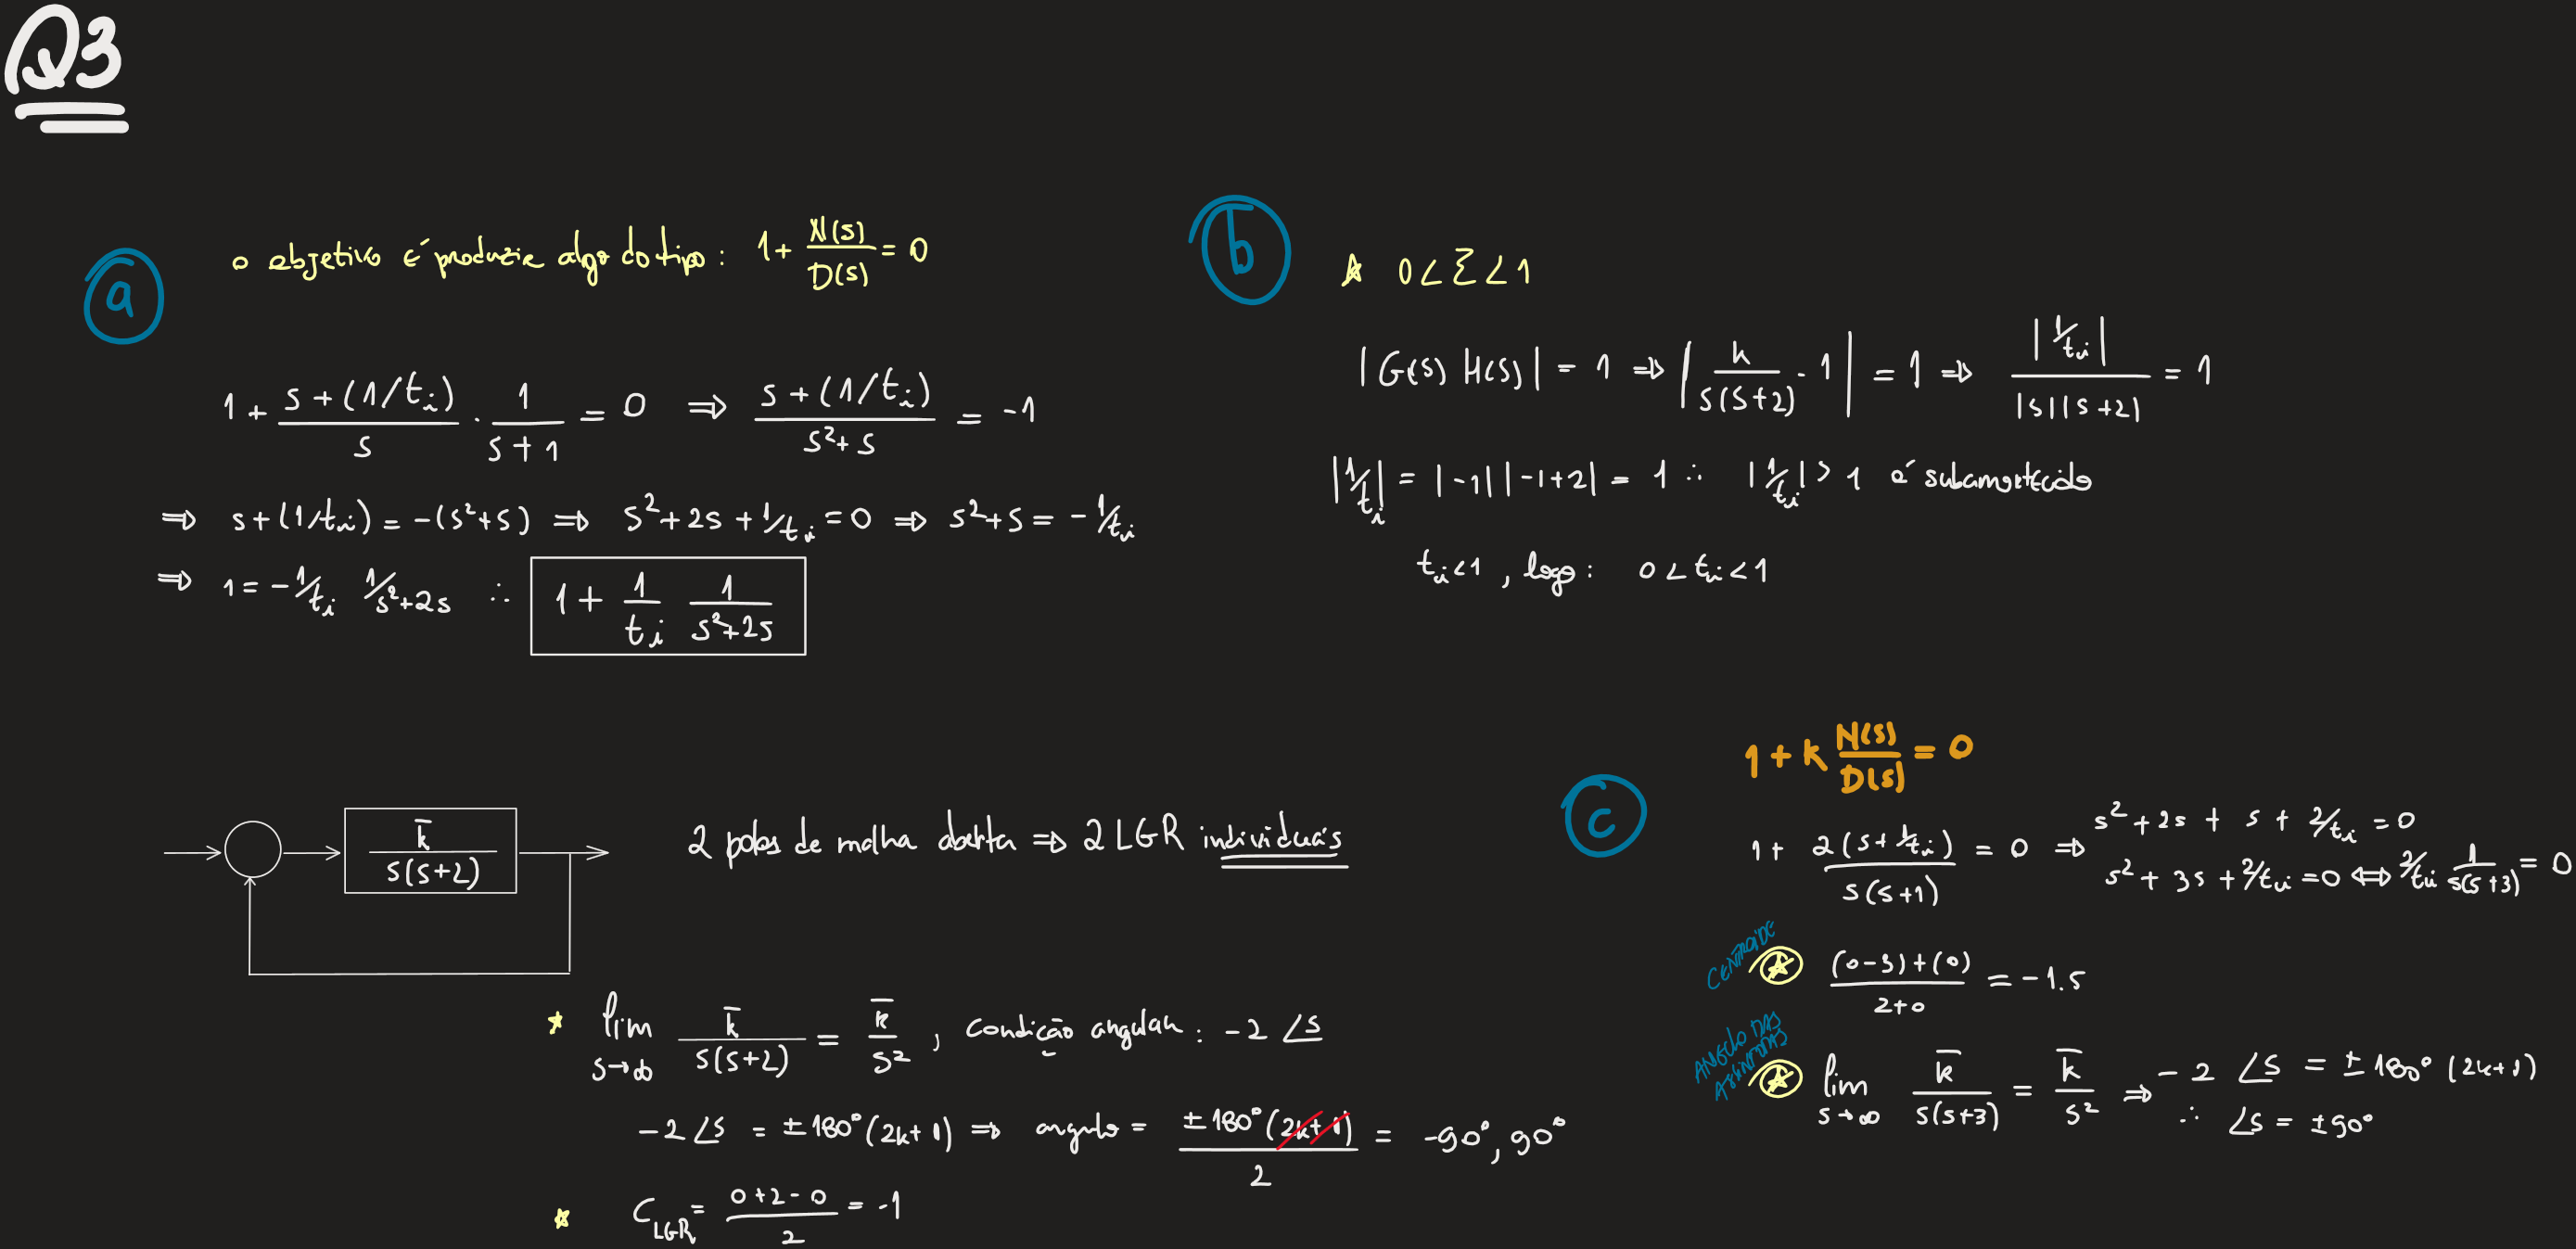

# <font color='green' style='font-size: 40px;'> Questão 4 | P2 | 2019.1  </font> <hr style='border: 2px solid green;'>

## <font color='green' style='font-size: 28px;'>Dado o lugar das raízes de (figura B).</font> 

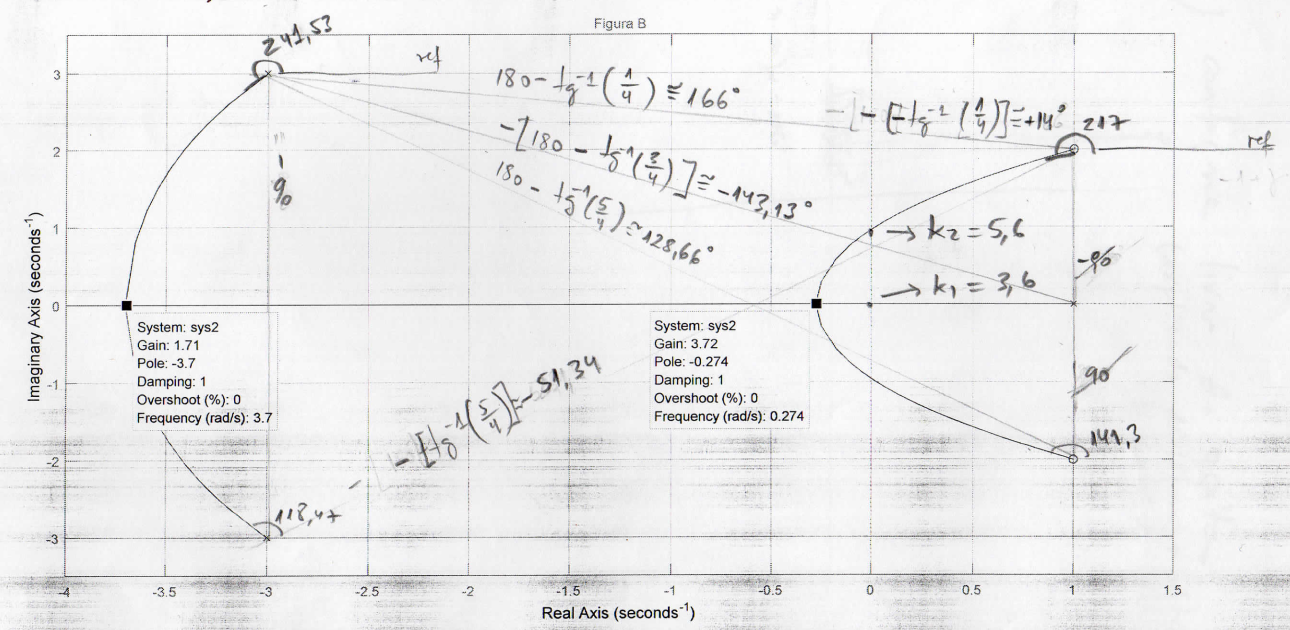

## <font color='green' style='font-size: 22px;'> a) determine G(s) </font> 

## <font color='green' style='font-size: 22px;'> b) Utilize todas as regras necessárias para validar o traçado desse lugar das raízes. </font> 

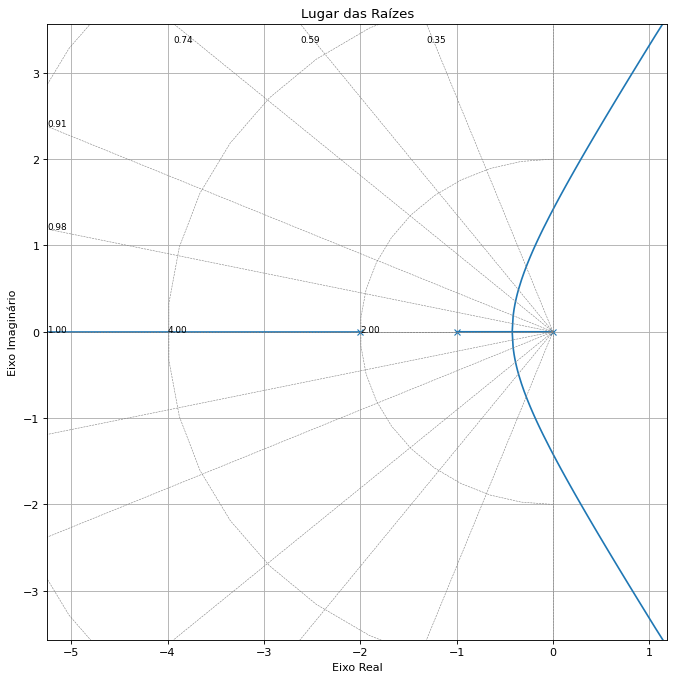

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# parâmetro k
k = 1

# Definindo a função de transferência da malha aberta 
G = ctl.tf([k*1], [1, 3, 2, 0])

# Defina o tamanho do gráfico e a densidade de pontos
plt.figure(figsize=(10,10), dpi=80)

# Plote o lugar das raízes
ctl.root_locus(G, plot=True, grid=True, print_gain=True)

# Configurações do gráfico
plt.title('Lugar das Raízes')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.grid(True)

# Exiba o gráfico
plt.show()


## <font color='green' style='font-size: 22px;'> c) use a condição de módulo para determinar a faixa de valores de k que tornam o sistema estável. </font> 

## Memória de cálculo e dúvidas <hr style='line: 2px solid white;'>